## Working with an Oscilloscope and Faraday's Law
###### By Brandon Weiss
#### 6 October 2020

###### Objective
Want to examine and justify Faraday's Law by using a magnet, inductor, and oscilloscope.

###### Procedure:
1. Setup oscilloscope as shown in image below, but with trigger set to `NORM`.
1. Pass a magnet by the end of the coil quickly and record the results.

###### Setup of the lab

<img src="oscsetup.jpg">

###### Schematic of the connections

<img src="oscSchematic.jpg">

###### Graph from the oscilloscope

<img src="oscgraph1.jpg">

Faraday's Law states Voltage generated = $-N\frac{d\Phi_B}{dt}$.

N is constant, so voltage is proportional to the time rate change of the magnetic flux through the inductor. When passing a magnet by the inductor, the magnetic flux increases as the magnet approaches, reaches a maximum at the point of closest approach, and decreases when moving away. This would make the graph of magnetic flux over time look like a gaussian, the derivative of which looks like the graph shown on the oscilloscope. This shows that the result on the oscilloscope lines up with what is described by Faraday's Law.

###### Graphical depiction of above statement

<img src="oscExp.jpg">

#### 13 October 2020

Used https://apps.automeris.io/wpd/ to get data points

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [70]:
datum = np.loadtxt('Default Dataset.csv', delimiter=',')

In [71]:
xset = datum[:,0]
yset = datum[:,1]

In [144]:
def fit(x, A, B, C, D):
    return A * (x - B) * np.exp(C*(x - B)**2) + D

In [160]:
guess = (-11, 0.0001, -150, -0.001)
fitparams, covars = curve_fit(fit, xset, yset, p0=guess)
print("Parameters: " + str(fitparams))
print([covars[i,i] for i in range(len(covars))])

Parameters: [-1.18196582e+05  1.21995900e-04 -2.00473183e+10 -5.38576075e-03]
[7750607.528914038, 3.689990356083519e-15, 2.3782846017735626e+17, 4.2355520590610715e-06]


In [161]:
def calcRes(x, y, fit):
    res = np.subtract([fit[0] * (z - fit[1]) * np.exp(fit[2]*(z - fit[1])**2) + fit[3] for z in x], y)
    return res
res = calcRes(xset, yset, fitparams)

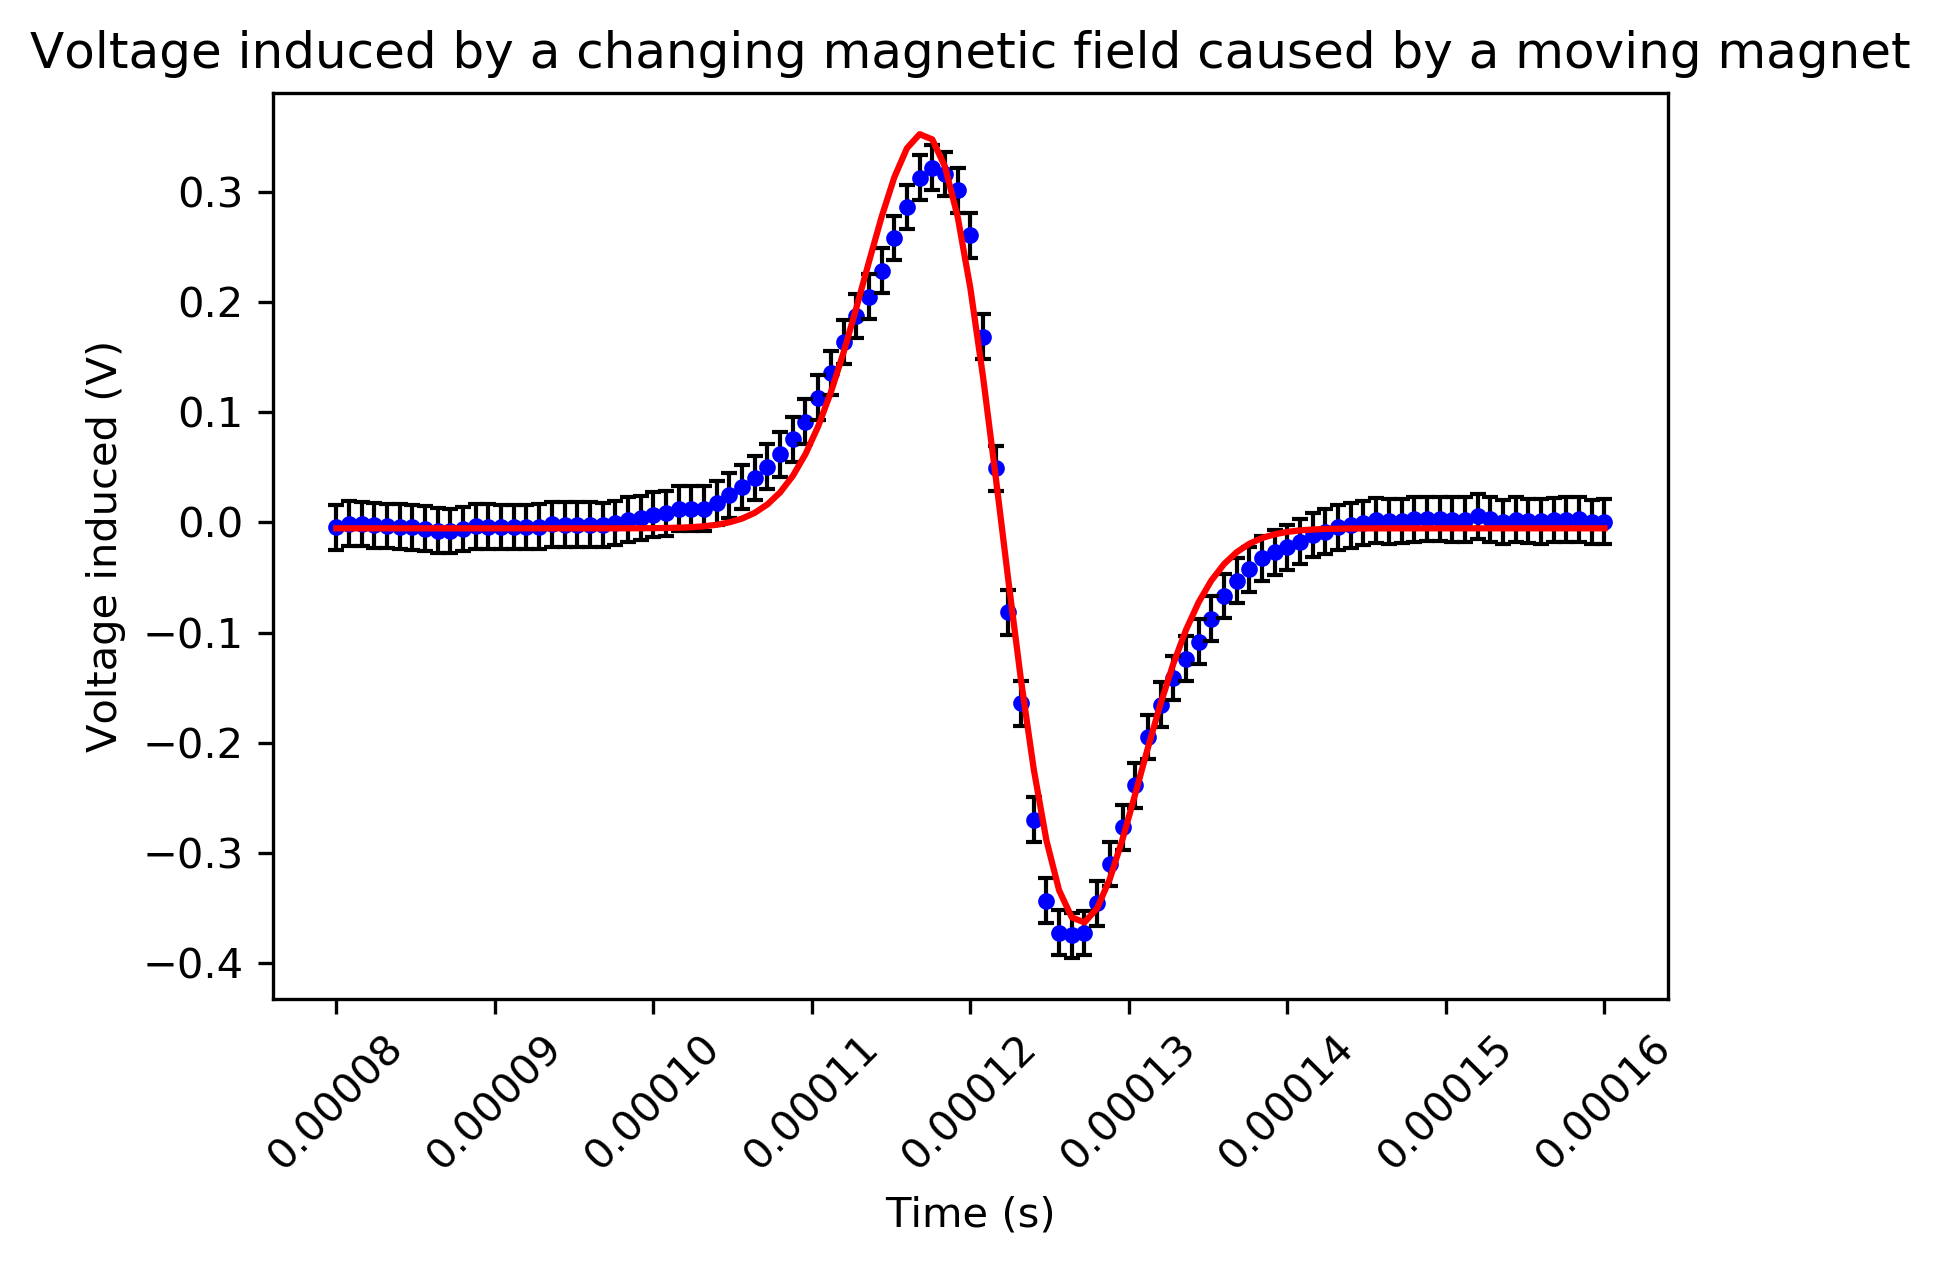

In [162]:
plt.figure(dpi=300)
plt.title("Voltage induced by a changing magnetic field caused by a moving magnet")
plt.ylabel("Voltage induced (V)")
plt.xlabel("Time (s)")
plt.xticks(rotation=45)
plt.plot(xset, yset, 'b.')
plt.errorbar(xset, yset, np.std(res), ls='none', color='black', capsize=2, elinewidth=1)
plt.plot(xset, [fitparams[0] * (z - fitparams[1]) 
                * np.exp(fitparams[2]*(z - fitparams[1])**2) + fitparams[3] for z in xset], "r-")

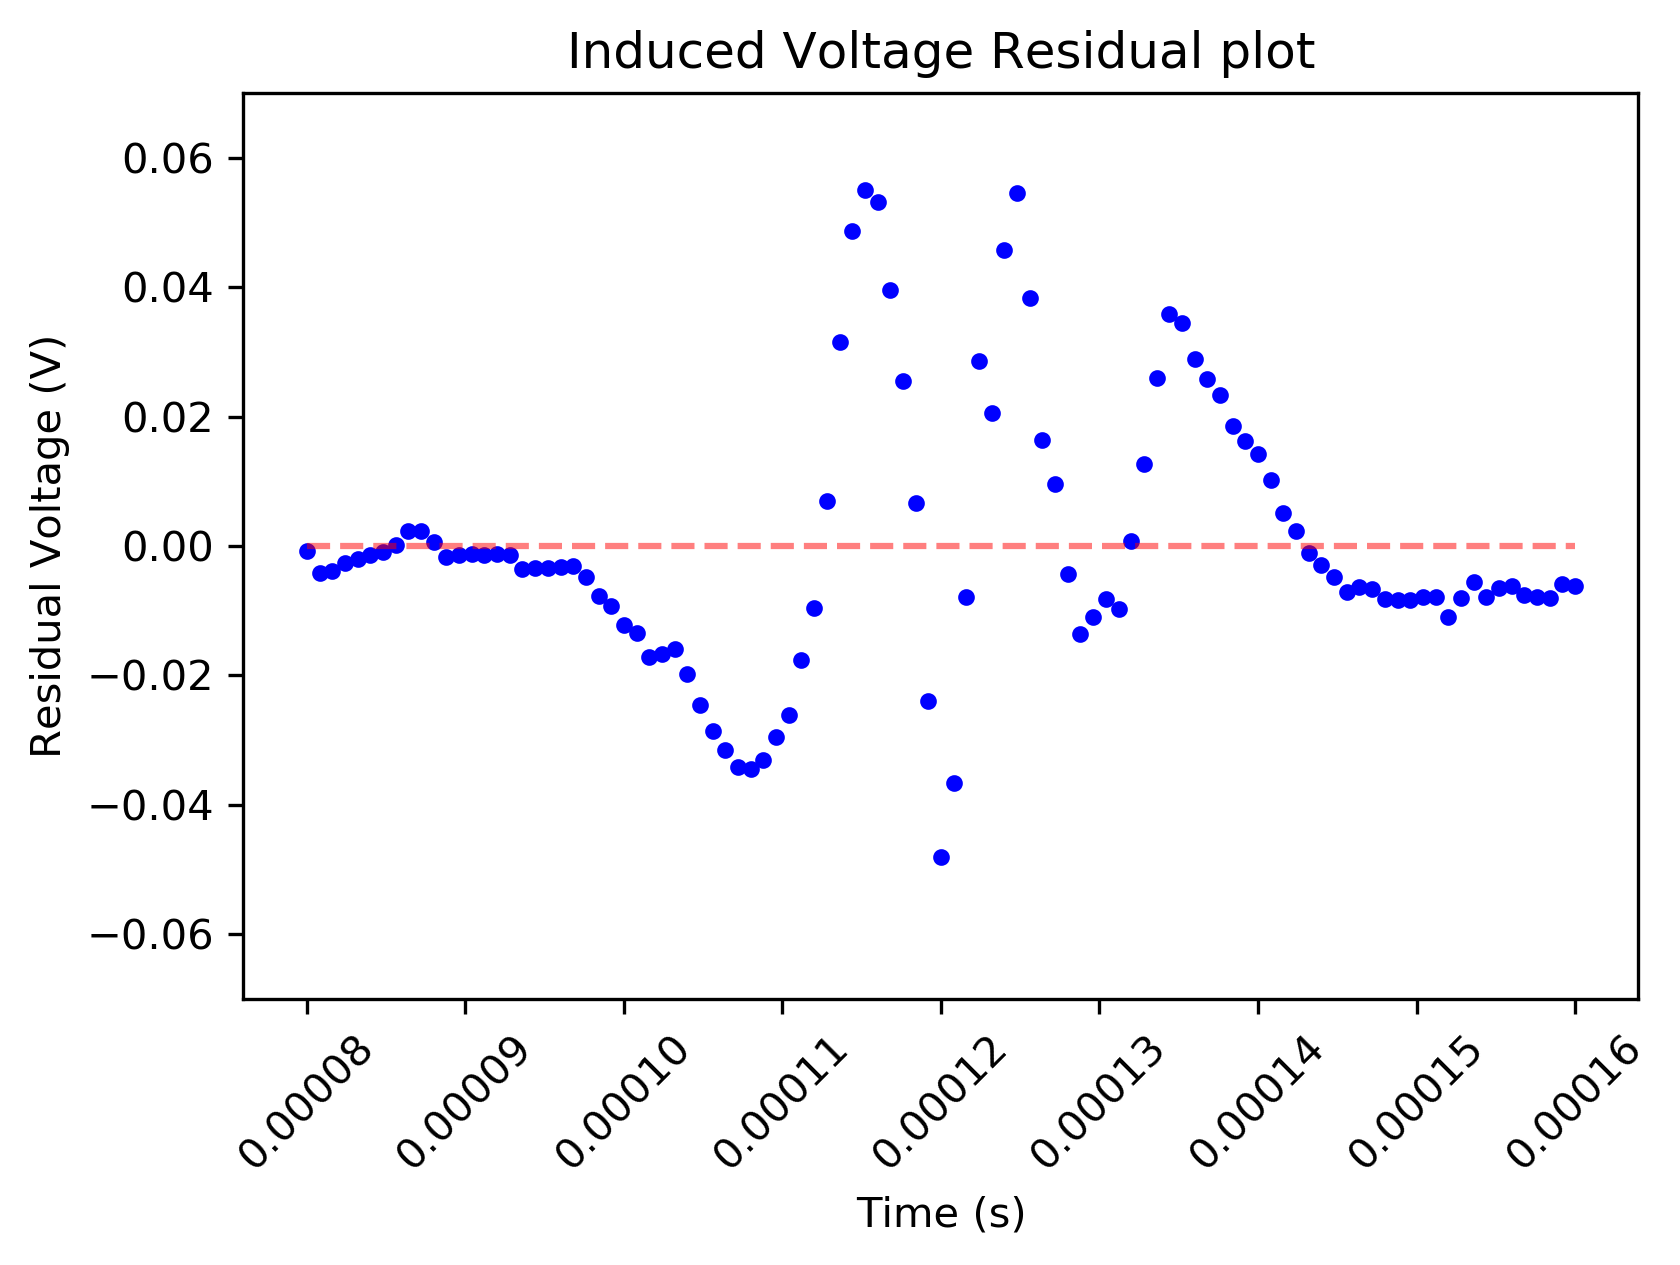

In [165]:
# Plotting the residual of all the data points
plt.figure(dpi=300)
plt.ylim(ymin=-0.07, ymax=0.07)
plt.title('Induced Voltage Residual plot')
plt.ylabel('Residual Voltage (V)')
plt.xlabel('Time (s)')
plt.xticks(rotation=45)
plt.plot(xset, res, "b.")
plt.plot(xset, np.zeros(len(xset)), "r--", alpha=0.5)

In [139]:
print(np.std(res))

0.0202693992825263
